Import necessary packages.

In [1]:
# import all functions from python labrary: sympy
from sympy import *
# import python library: matplotlib (for nice plots)
import matplotlib
# set sympy output to print pretty math expressions
init_printing()

Declare variables we are going to use as 'symbols'. We will add more along the way, if necessary.

In [38]:
### NOTE: it is important here to further declare these variables to be nonzero and positive (otherwise sympy cannot find solution for the FOCs)
#    Thanks to Abhi Agarwal for discovering this trick
q1, q2, p1, p2, ubar = symbols('q1 q2 p1 p2 \overline{U}', nonzero=True, positive=True)

# 7. Solve for expenditure-minimizing consumption bundle analytically

## Setup the optimization program

Our optimization problem is
\begin{align}
    & \min_{q_1,q_2} \quad p_1 q_1 + p_2 q_2 \\
    \text{s.t.}\quad & q_1^{\alpha} q_2^{1-\alpha} = \overline{U}
\end{align}

## Setup the utility function

In [18]:
### Note that it is important here to further declare these variables to be nonzero and positive
#    Thanks to Abhi Agarwal for discovering this trick
alpha = symbols('alpha',nonzero=True, positive=True)
# define parameter beta as 1 - alpha
beta = 1 - alpha


# Note: in sympy syntax: use double star ** for power
u = q1**(alpha) * q2**(beta)
# show the defined function
u

## Setup the lagrangian

In [33]:
lam = symbols('lambda')
lagr = p1*q1 + p2*q2 + lam *(ubar - u)
lagr

Solve the first-order conditions. 

Note the syntax of the solve function, especially the use of the brackets:
solve( (eq1, eq2, eq3), var1, var2, var3)

The equations are by default treated as equal to 0 by the solver.

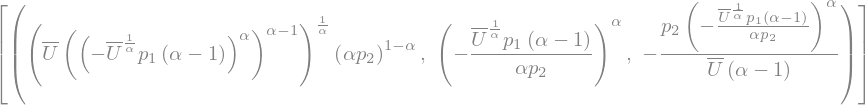

In [34]:
foc_sol = solve( ( diff(lagr,q1), diff(lagr,q2), diff(lagr,lam) ), [q1,q2,lam])
foc_sol

The solution is a list with one element, because our solution is unique.

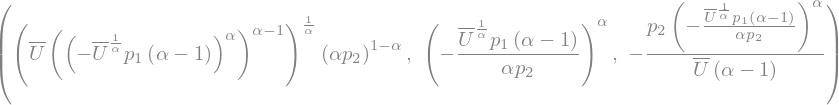

In [24]:
foc_sol[0]

To access the first element in our solution, which is a list by itself, we use the list index again.

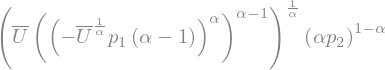

In [32]:
q1star = foc_sol[0][0]
q1star

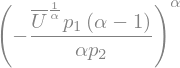

In [36]:
q2star = foc_sol[0][1]
q2star

Substitute optimal consumption into the cost, to calculate the minimum expenditure level necessary at the given exogenous variables. 

The resulting function is our **expenditure function**, $E(p_1,p_2,\overline{U})$.

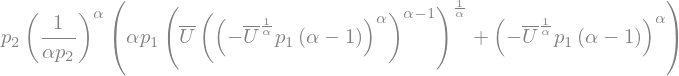

In [37]:
E = (p1*q1 + p2*q2).subs([(q1,q1star), (q2,q2star)])
# simplify function does not work well here, but we can further simplify by hand
E.simplify()